In [1]:


# debut *********************************************************************************



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from keras.layers import Dense, Dropout
from matplotlib.pyplot import imshow
%matplotlib inline
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense
print (keras.__version__)
from sklearn.preprocessing import MinMaxScaler
import keras
import pandas
from PIL import Image
from matplotlib.pyplot import imshow
from keras import utils as np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

2.12.0


#  Chargement des jeux de données

In [2]:

from keras.datasets import mnist


2023-08-27 16:26:07.343205: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-27 16:26:07.694686: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-27 16:26:07.702768: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-27 16:26:09.627305: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:

(images_entrainement,labels_entrainement),(images_test,labels_test)=mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [5]:

images_entrainement.shape


(60000, 28, 28)

In [6]:

labels_entrainement.shape


(60000,)

In [7]:

images_test.shape


(10000, 28, 28)

In [8]:

labels_test.shape


(10000,)

In [9]:

labels_entrainement[0:10]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# Préparation des données

In [10]:
# Données d'Entrainement : 
# selection des chiffres 5 et 6

images_entrainement_new, labels_entrainement_new = images_entrainement[(labels_entrainement==5) | (labels_entrainement==6)],\
labels_entrainement[(labels_entrainement==5) | (labels_entrainement==6)]


In [11]:

images_entrainement_new.shape


(11339, 28, 28)

In [12]:
# Données d'entrainement:
# Normalisation

images_entrainement_final = images_entrainement_new.reshape(11339, 784)
images_entrainement_final = images_entrainement_final.astype('float32')/255


In [13]:
# Données de test :
# selection des chiffres 5 et 6

images_test_new, labels_test_new = images_test[(labels_test==5) | (labels_test==6)],\
labels_test[(labels_test==5) | (labels_test==6)]


In [14]:

images_test_new.shape


(1850, 28, 28)

In [15]:
# Données de test:
# Normalisation 

images_test_final = images_test_new.reshape(1850, 784)
images_test_final = images_test_final.astype('float32')/255


In [16]:
# Données d'entrainement 

# Encodage des étiquettes
from sklearn import preprocessing
import tensorflow as tf

# Encodage des etiquettes afin qu'elles soit utilisable par le réseau de neurones
le = preprocessing.LabelEncoder()

# Encodage des chiffres
labels_entrainement_new_fit=le.fit_transform(labels_entrainement_new)
catego_labels_entrainement_new=tf.keras.utils.to_categorical(labels_entrainement_new_fit,num_classes=2,dtype='float32')


In [17]:
# Données de test

# Encodage des étiquettes
from sklearn import preprocessing
import tensorflow as tf

# Encodage des etiquettes afin qu'elles soit utilisable par le réseau de neurones
le = preprocessing.LabelEncoder()

# Encodage des chiffres.
labels_test_new_fit=le.fit_transform(labels_test_new)
catego_labels_test_new=tf.keras.utils.to_categorical(labels_test_new_fit,num_classes=2,dtype='float32')


## Architecture de reseau

In [115]:


model = Sequential([
   Dense(16, activation='relu', input_shape=(784,)),
   Dropout(rate=0.05),
   Dense(16, activation='relu'),
   Dropout(rate=0.05),
   Dense(16, activation='relu'),
   Dense(2, activation='softmax')
])


In [ ]:
model.summary()

## Compilation  du modele

In [116]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Entrainement du modele


history=model.fit(
  x=images_entrainement_final,
  y=catego_labels_entrainement_new,
  shuffle=True,
  epochs=3,
  batch_size=64,
  validation_split=0.3
)


In [118]:
# Pour faire une évaluation

evaluation = model.evaluate(images_test_final, catego_labels_test_new)


58/58 [==============================] - 0s 1ms/step - loss: 0.0538 - accuracy: 0.9805


# Tracé des courbes

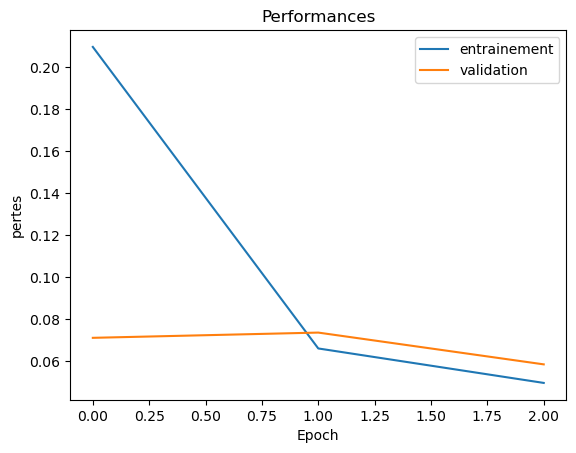

In [119]:
# Affichage des pertes

from matplotlib import pyplot

pyplot.title('Performances')
pyplot.xlabel('Epoch')
pyplot.ylabel('pertes')
pyplot.plot(history.history['loss'], label='entrainement')
pyplot.plot(history.history['val_loss'], label='validation')


pyplot.legend()
pyplot.show()


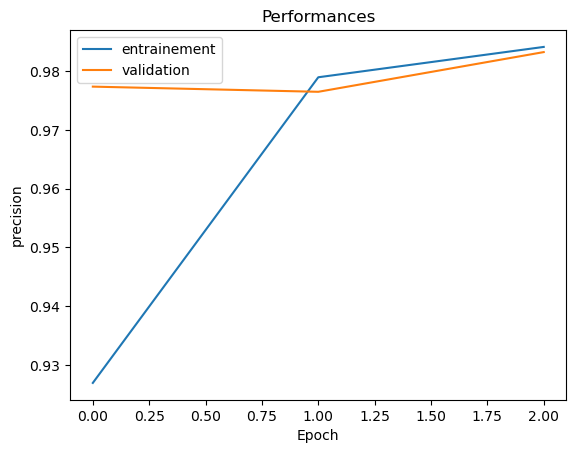

In [120]:
# Affichage de la précision

from matplotlib import pyplot

pyplot.title('Performances')
pyplot.xlabel('Epoch')
pyplot.ylabel('precision')
pyplot.plot(history.history['accuracy'], label='entrainement')
pyplot.plot(history.history['val_accuracy'], label='validation')

pyplot.legend()
pyplot.show()


# Sauvegarde du modele

In [98]:

# Sauvegarde du modele


model.save(r'./classification_2_classes_Keras.hdf5')


# Prédictions

In [99]:
# Pour faire des prédictions

predictions = model.predict(images_test_final,
                            batch_size=10,
                            verbose=0) 


In [100]:
# Keras nous propose une autre méthode intéressante,
# qui peut être utilisée pour prédire les valeurs de nouvelles données 
# (données que le réseau n'a pas encore vues). 
# Comme nous n'avons pas séparé auparavant un tel ensemble,
# mais seulement divisé l'ensemble MNIST en données d'apprentissage et de test,
# nous n'utiliserons qu'un sous-ensemble des données de test.
# La méthode renverra un tableau de bord de 100 éléments.
# Chaque élément indiquera les probabilités que l'entrée appartienne à une classe donnée.


predictions = model.predict(images_test_final[0:100])


4/4 [==============================] - 0s 2ms/step


In [101]:
#  pour voir la prédiction 
# la plupart des valeurs sont de très petits nombres 
# (très faible probabilité que l'image appartienne à cette classe)
# 

predictions[0]


array([0.00624066, 0.9937594 ], dtype=float32)

In [102]:

np.argmax(predictions[1])


1

In [103]:

labels_test_new[1]


6

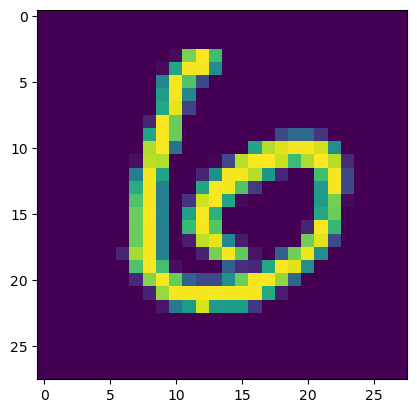

In [104]:
# Vérifions à quoi ressemble l'image. 
# Rappelez-vous que les données d'entrée du réseau ont été aplaties 
# dans le but de creer un vecteur d'une longueur de 784.
# Avant de l'afficher, nous devons le reconvertir à la taille de 28 x 28 pixels. 

plt.imshow(images_test_new[1].reshape(28,28))


In [105]:
# nous avons un tableau à deux dimensions, 
# et non à un vecteur comme avec l'utilisation précédente de argmax,
# Dans notre cas, le long de l'axe y, c'est-à-dire axis = 1. 

# le chiffre 0 représente le 5
# le chiffre 1 représente le 6


la_prediction=np.argmax(predictions, axis=1)


In [4]:
# Dans le cadre d une classification 
# pour remplacer des chiffres par d'autres
# le chiffre 5 est labelisé 0
# le chiffre 6 est labelidé 1



labels_test_new_final = np.zeros(la_prediction.shape)
labels_test_new_final[np.where(la_prediction==1.0)[0]] = 6 # remplace le 6 par 1
labels_test_new_final[np.where(la_prediction==0.0)[0]] = 5 # remplace le 5 par 0
labels_test = labels_test_new_final

labels_test_prediction = labels_test_new_final.T

print('\n labels_test_prediction =',labels_test_prediction[0:10])


NameError: name 'np' is not defined

In [107]:
labels_test_prediction=labels_test_prediction.astype(np.uint8)

In [108]:
labels_test_prediction[0:100]

array([6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6,
       5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6], dtype=uint8)

In [109]:
labels_test_new[0:100]

array([5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 5, 6,
       5, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5,
       6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6], dtype=uint8)

In [36]:
# pour verifier ou il y a des erreurs.....si elle existe !

fausse_prediction = np.argmin(np.argmax(predictions, axis=1) == labels_test_new[0:100])
fausse_prediction


0

In [37]:
# Appliquons un softmax, pour obtenir des probabilités
# La somme d une ligne est égale à 1
# La fonction tf.nn.softmax convertit ces logits en probabilités pour chaque classe :
# La première colonne correspond aux probabilités de la classe 0 c'est à dire le premier chiffre
# La seconde colonne correspond aux probabilités de la classe 1 c'est à dire le deuxieme chiffre
# 
# ici la classe 5 est représentée par 0
# ici la classe 6 est représentée par 1




print(tf.nn.softmax(predictions[:10]))

# Methone pour afficher les classes des chiffres
name_classes=[5,6]
one_hot_encode=pandas.get_dummies(name_classes)
one_hot_encode


tf.Tensor(
[[0.66115654 0.33884346]
 [0.26894718 0.7310529 ]
 [0.73105276 0.26894724]
 [0.35361135 0.64638865]
 [0.26894832 0.7310516 ]
 [0.7310485  0.26895148]
 [0.7310353  0.26896468]
 [0.26940918 0.7305908 ]
 [0.7310539  0.2689461 ]
 [0.731019   0.26898092]], shape=(10, 2), dtype=float32)


,5,6
0,1,0
1,0,1


In [38]:

labels = (labels_test_new)[0:30]
print("Prediction: {}".format(tf.argmax(predictions[0:30], axis=1)))
print("    Labels: {}".format(labels))

name_classes=[3,6,8,9]
one_hot_encode=pandas.get_dummies(name_classes)
one_hot_encode


Prediction: [0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 0]
    Labels: [5 6 5 6 6 5 5 6 5 5 6 5 6 6 6 6 6 6 5 5 6 5 5 6 6 5 6 6 5 5]


,3,6,8,9
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1


In [39]:


# fin ************************************************************************************

